In [1]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [15]:
files = ['../past_data/prices_round_3_day_0.csv', '../past_data/prices_round_3_day_1.csv', '../past_data/prices_round_3_day_2.csv']
dataframes = [pd.read_csv(file, delimiter=';') for file in files]
# Concatenate all DataFrames into one
day_0 = dataframes[0]
day_1 = dataframes[1]
day_2 = dataframes[2]


In [21]:
# Filter the data by each product type and save to separate CSV files
products = ["CHOCOLATE", "STRAWBERRIES", "ROSES", "GIFT_BASKET"]

# Creating and saving filtered CSV files for each product
file_paths = []
for product in products:
    filtered_data = day_2[day_2['product'] == product]
    file_name = f'../past_data/seperate_by_products/{product.lower()}_prices_2.csv'
    filtered_data.to_csv(file_name, index=False)
    file_paths.append(file_name)

file_paths

['../past_data/seperate_by_products/chocolate_prices_2.csv',
 '../past_data/seperate_by_products/strawberries_prices_2.csv',
 '../past_data/seperate_by_products/roses_prices_2.csv',
 '../past_data/seperate_by_products/gift_basket_prices_2.csv']

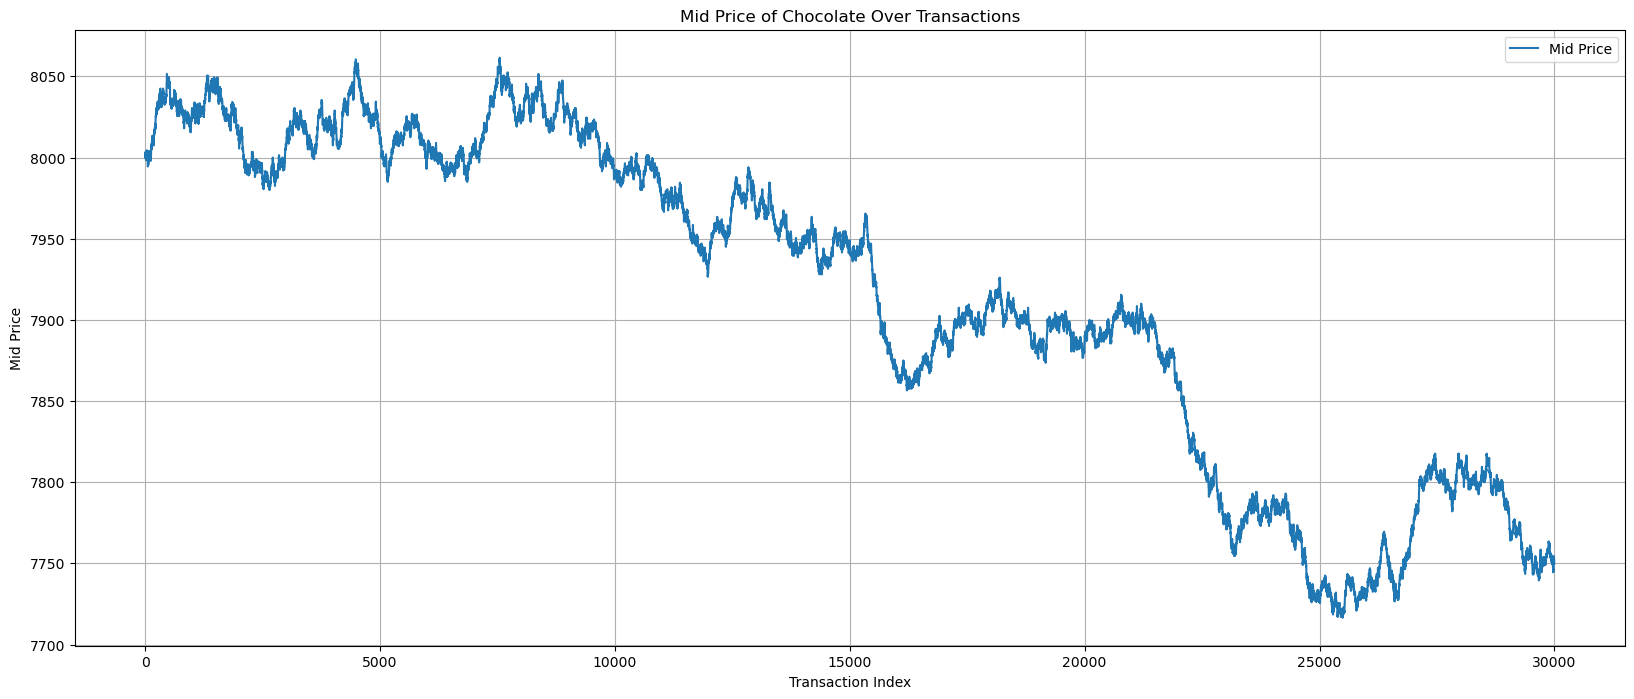

In [28]:
import matplotlib.pyplot as plt

# Load the new CSV file for 'chocolate_prices' to create a plot
chocolate_data_path = '../past_data/seperate_by_products/chocolate_prices.csv'
chocolate_data = pd.read_csv(chocolate_data_path)
# Display the head of the chocolate data to confirm loading and to plan the plot
chocolate_data.head()

# Plotting the data
plt.figure(figsize=(20, 8))
plt.plot(chocolate_data['mid_price'], label='Mid Price')
plt.title('Mid Price of Chocolate Over Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Mid Price')
plt.legend()
plt.grid(True)
plt.show()



In [30]:
# Load the CSV files for each product to access the 'mid_price' column
chocolate_data = pd.read_csv('../past_data/separate_by_products/chocolate_prices.csv')
strawberries_data = pd.read_csv('../past_data/separate_by_products/strawberries_prices.csv')
roses_data = pd.read_csv('../past_data/separate_by_products/roses_prices.csv')
gift_basket_data = pd.read_csv('../past_data/separate_by_products/gift_basket_prices.csv')

# Extracting the 'mid_price' column from each dataset
prices_data = pd.DataFrame({
    'Chocolate_Mid_Price': chocolate_data['mid_price'],
    'Strawberries_Mid_Price': strawberries_data['mid_price'],
    'Roses_Mid_Price': roses_data['mid_price'],
    'Gift_Basket_Mid_Price': gift_basket_data['mid_price']
})

# Save this new DataFrame to a CSV file
prices_combined_file_path = '../past_data/combined_mid_prices.csv'
prices_data.to_csv(prices_combined_file_path, index=False)

prices_data.head(), prices_combined_file_path

(   Chocolate_Mid_Price  Strawberries_Mid_Price  Roses_Mid_Price  \
 0               8000.0                  4000.0          15000.0   
 1               8001.5                  3999.5          15000.0   
 2               8001.0                  3999.5          15000.5   
 3               8002.5                  3999.5          15000.0   
 4               8002.0                  3999.5          14997.5   
 
    Gift_Basket_Mid_Price  
 0                71355.0  
 1                71349.5  
 2                71347.0  
 3                71350.5  
 4                71341.5  ,
 '../past_data/combined_mid_prices.csv')